In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [234]:
from helpers import load_data


# load dataset
#x, y = load_data()
N = 10000
x = 2.0/N*np.arange(0, N)
y = 4*x**3 - 3*x**2  - 2*x + 1 #+ np.random.normal(0, 0.01, N)

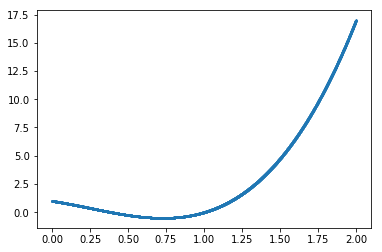

In [235]:
fig = plt.figure()
plt.scatter(x, y, s=1)
plt.show()

In [236]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [237]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    indices_test = k_indices[k-1]
    indices_train = np.concatenate(k_indices[:(k-1)])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_poly = build_poly(x, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    weights = ridge_regression(y[indices_train], x_poly[indices_train, :], lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_mse(y[indices_train], x_poly[indices_train, :], weights)
    loss_te = compute_mse(y[indices_test], x_poly[indices_test, :], weights)
    return loss_tr, loss_te, weights

0 [ 1.00000400e+00 -2.00007623e+00 -2.99964522e+00  3.99932777e+00
  6.04251809e-04 -2.57073194e-04  4.16831550e-05] 3.583174310632665e-13


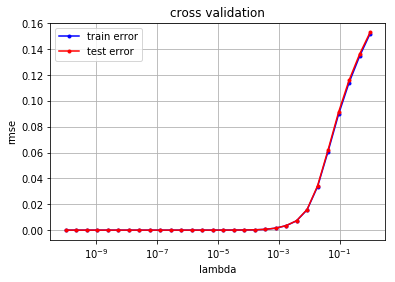

In [239]:
from plots import cross_validation_visualization

def cross_validation_demo(y,x ):
    seed = 20
    degree = 7
    k_fold = 5
    lambdas = np.logspace(-10, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    errors = [cross_validation(y, x, k_indices, k_fold, lambda_, degree) for lambda_ in lambdas]
    
    rmse_tr, rmse_te, weights = zip(*errors)
    best_idx = np.array(rmse_te).argmin()
    print (best_idx, weights[best_idx], rmse_te[best_idx])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo(y,x)

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

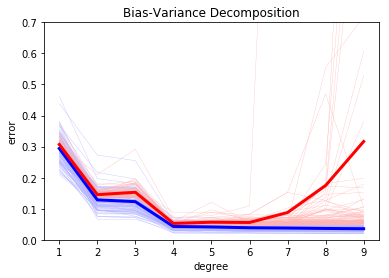

In [249]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.004
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_tr, x_te, y_tr, y_te = split_data(x,y,ratio_train,seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            x_p_tr = build_poly(x_tr, degree)
            x_p_te = build_poly(x_te, degree)
            rmse_tr[index_seed, index_degree], w = least_squares(y_tr, x_p_tr)
            rmse_te[index_seed, index_degree] = compute_mse(y_te, x_p_te, w)
            

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()